In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from scipy.stats import skew
import scipy.stats as st

 *NOTA IMPORTANTE!!!*

Para este ejercicio se ha cogido un df de los crímenes en los Angeles entre el 2010 y 2017. Debido a la cantidad de datos que contenia (más de un millón y medio), pesaba demasiado y no se podía subir a git. De esta manera, se ha tenido que disminuir el df para poder guardarlo en el repositorio de git. 

    Para ello hemos:
        1. filtrado los datos y nos hemos quedado con solo aquellos datos del 2017
        2. eliminado todas las filas que contenían al menos, 1 nan (no es lo que más nos gusta pero el objetivo principal, as ser un archivo académico, era poder subirlo a git para poder trabajr con él desde diferentes dispositivos)


In [3]:
# df = pd.read_csv('Crime_data_2010_2017.csv', encoding='ISO-8859-1')

In [4]:
# def año (date=df['Date Occurred']):
#     return date.split('/')[2]


In [5]:
#df['Year'] = df['Date Occurred'].apply(año)

In [6]:
#df.head()

In [7]:
#pd.to_numeric(df.Year)

In [8]:
#df2 = df[df['Year']=='2017']

In [9]:
#df2.to_csv('Crime_Data_2017.csv')

In [10]:
df = pd.read_csv('Crime_Data_2017.csv')

In [11]:
# df.dropna(how='any', inplace=True)

In [12]:
# df.to_csv('Crime_Data_2017.csv')

In [13]:
df.head()

,Unnamed: 0,Unnamed: 0.1,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,...,Premise Code,Premise Description,Weapon Used Code,Weapon Description,Status Code,Status Description,Address,Cross Street,Location,Year
0,30,1428639,170104918,01/16/2017,01/16/2017,820,1,Central,111,624,...,102.0,SIDEWALK,308.0,STICK,IC,Invest Cont,ARCADIA,SPRING,"(34.0565, -118.2411)",2017
1,44,1429591,170100514,01/07/2017,01/07/2017,1040,1,Central,159,230,...,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,7TH,DECATUR,"(34.0348, -118.235)",2017
2,57,1429604,170100537,01/16/2017,01/16/2017,5,1,Central,162,230,...,102.0,SIDEWALK,307.0,VEHICLE,AO,Adult Other,8TH ST,OLIVE ST,"(34.0459, -118.2579)",2017
3,60,1429607,170100540,01/16/2017,01/16/2017,1955,1,Central,124,230,...,102.0,SIDEWALK,200.0,KNIFE WITH BLADE 6INCHES OR LESS,AA,Adult Arrest,2ND,MAIN,"(34.0514, -118.2451)",2017
4,61,1429608,170100541,01/16/2017,01/16/2017,2315,1,Central,176,626,...,102.0,SIDEWALK,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,8TH,WALL,"(34.0401, -118.2504)",2017


In [14]:
df.shape

(12961, 25)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12961 entries, 0 to 12960
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              12961 non-null  int64  
 1   Unnamed: 0.1            12961 non-null  int64  
 2   DR Number               12961 non-null  int64  
 3   Date Reported           12961 non-null  object 
 4   Date Occurred           12961 non-null  object 
 5   Time Occurred           12961 non-null  int64  
 6   Area ID                 12961 non-null  int64  
 7   Area Name               12961 non-null  object 
 8   Reporting District      12961 non-null  int64  
 9   Crime Code              12961 non-null  int64  
 10  Crime Code Description  12961 non-null  object 
 11  MO Codes                12961 non-null  object 
 12  Victim Age              12961 non-null  float64
 13  Victim Sex              12961 non-null  object 
 14  Victim Descent          12961 non-null

In [16]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,DR Number,Time Occurred,Area ID,Reporting District,Crime Code,Victim Age,Premise Code,Weapon Used Code,Year
count,12961.000000,1.296100e+04,1.296100e+04,12961.000000,12961.000000,12961.000000,12961.000000,12961.000000,12961.000000,12961.000000,12961.0
mean,76028.337242,1.506235e+06,1.710270e+08,1358.163490,10.150837,1062.180387,426.164879,34.937273,135.688527,339.605509,2017.0
std,46549.477653,4.737261e+04,6.459390e+05,688.507205,6.416114,637.827749,236.009918,14.752338,120.693282,127.825638,0.0
min,30.000000,1.428639e+06,1.701005e+08,1.000000,1.000000,101.000000,110.000000,10.000000,101.000000,101.000000,2017.0
25%,31924.000000,1.461471e+06,1.704009e+08,900.000000,4.000000,411.000000,220.000000,23.000000,101.000000,218.000000,2017.0
50%,79695.000000,1.509243e+06,1.712009e+08,1500.000000,12.000000,1203.000000,236.000000,32.000000,102.000000,400.000000,2017.0
75%,117112.000000,1.547937e+06,1.715180e+08,1930.000000,15.000000,1595.000000,624.000000,46.000000,102.000000,400.000000,2017.0
max,151518.000000,1.584246e+06,1.799089e+08,2359.000000,21.000000,2189.000000,956.000000,99.000000,811.000000,516.000000,2017.0


In [17]:
df.describe(include=object)

,Date Reported,Date Occurred,Area Name,Crime Code Description,MO Codes,Victim Sex,Victim Descent,Premise Description,Weapon Description,Status Code,Status Description,Address,Cross Street,Location
count,12961,12961,12961,12961,12961,12961,12961,12961,12961,12961,12961,12961,12961,12961
unique,252,252,21,76,10064,3,13,101,63,5,5,2351,2569,6208
top,08/20/2017,04/23/2017,77th Street,ROBBERY,0416,M,H,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,6TH ST,BROADWAY,"(0, 0)"
freq,82,86,1361,2959,463,7448,6616,6343,6917,9944,9944,208,262,366


In [18]:
df.isnull().sum()

Unnamed: 0                0
Unnamed: 0.1              0
DR Number                 0
Date Reported             0
Date Occurred             0
Time Occurred             0
Area ID                   0
Area Name                 0
Reporting District        0
Crime Code                0
Crime Code Description    0
MO Codes                  0
Victim Age                0
Victim Sex                0
Victim Descent            0
Premise Code              0
Premise Description       0
Weapon Used Code          0
Weapon Description        0
Status Code               0
Status Description        0
Address                   0
Cross Street              0
Location                  0
Year                      0
dtype: int64

In [19]:
df[df.duplicated()].count()

Unnamed: 0                0
Unnamed: 0.1              0
DR Number                 0
Date Reported             0
Date Occurred             0
Time Occurred             0
Area ID                   0
Area Name                 0
Reporting District        0
Crime Code                0
Crime Code Description    0
MO Codes                  0
Victim Age                0
Victim Sex                0
Victim Descent            0
Premise Code              0
Premise Description       0
Weapon Used Code          0
Weapon Description        0
Status Code               0
Status Description        0
Address                   0
Cross Street              0
Location                  0
Year                      0
dtype: int64

In [20]:
df.dropna(how='all',inplace=True)

In [21]:
df.isnull().sum()

Unnamed: 0                0
Unnamed: 0.1              0
DR Number                 0
Date Reported             0
Date Occurred             0
Time Occurred             0
Area ID                   0
Area Name                 0
Reporting District        0
Crime Code                0
Crime Code Description    0
MO Codes                  0
Victim Age                0
Victim Sex                0
Victim Descent            0
Premise Code              0
Premise Description       0
Weapon Used Code          0
Weapon Description        0
Status Code               0
Status Description        0
Address                   0
Cross Street              0
Location                  0
Year                      0
dtype: int64

In [23]:
#df.drop(columns=['Crime Code 1', 'Crime Code 2', 'Crime Code 3', 'Crime Code 4'], inplace=True)

Moda, mediana, media, mínimo y máximo

In [24]:
moda = df['Crime Code Description'].mode()
media = df['Victim Age'].mean()
mediana = df['Victim Age'].median()
minimo = df['Victim Age'].min()
maximo = df['Victim Age'].max()
print(moda, '----', media, '----', mediana, '----', minimo, '----', maximo)

0    ROBBERY
dtype: object ---- 34.93727335853715 ---- 32.0 ---- 10.0 ---- 99.0


Gráficos

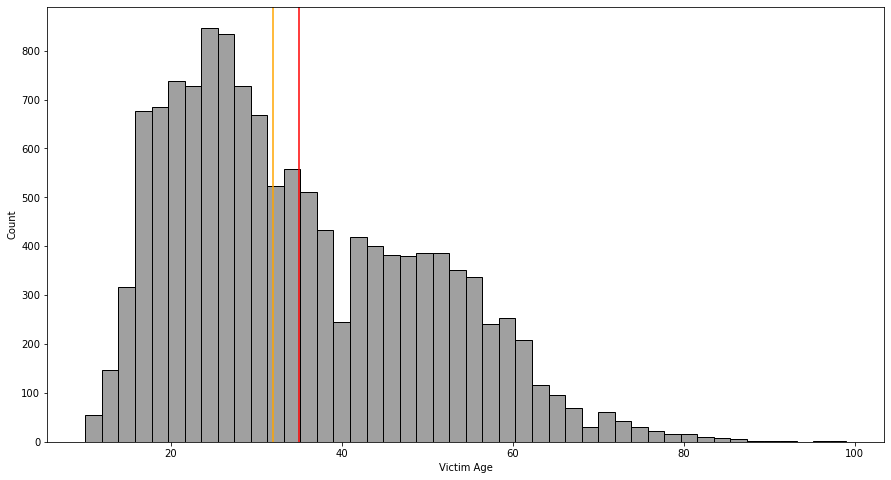

In [25]:
plt.figure(figsize=(15,8))
sns.histplot(data = df, x = "Victim Age", color = "grey")
plt.axvline(media, color='red')
plt.axvline(mediana, color='orange');

Queremos saber qué tipos de crímenes son los más dados y la edad de las personas que cometen estos crímenes. 

Con los datos obtenidos arriba, podemos ver que el crímen más cometido en 2017 en Los Ángeles es el robatorio y las personas que lo cometen tienen una edad media de 35 años, aunque teneos personas cometiendo crímenes hasta los 99 años, cosa que nos afecta a la media. La persona más joven en cometer un crímen ese año, tenia 10 años.